## Test deconvolution imports

Before testing the dependencies make sure you are in the new devbio-napari based environment you created in the last section.  Type the following.

```
mamba activate decon-dl-env
```

Now test whether the dependencies have been installed properly

In [1]:
try:
    import imnotthere as int
    imnothtere_found=True
    print('ImNotThere found')
except ImportError:
    imnotthere_found=False
    print('!ImNotThere NOT found')

try:
    from clij2fft.richardson_lucy import richardson_lucy_nc
    clij2_rl_found=True
    print('clij2fft found')
except ImportError:
    clij2_rl_found=False
    print('!clij2fft NOT found')
    
try:
    import RedLionfishDeconv as rl
    redlionfish_rl_found=True
    print('RLF found')
except ImportError:
    redlionfish_rl_found=False
    print('!RLF NOT found')
    
try:
    import cupy as cp
    cupy_found=True
    print('cupy found')
except ImportError:
    cupy_found=False
    print('!cupy NOT found')
    
import numpy as np
    

!ImNotThere NOT found
clij2fft found
RLF found
cupy found


## Get and open test images

1.  Get images from this link https://cloudstore.zih.tu-dresden.de/index.php/s/gHgFZnMtfAwNpEk or this link https://www.dropbox.com/scl/fo/ngs73x29t1ch8208d75lv/h?rlkey=7acq2epqp1f1x039q833ry6p4&dl=0
2.  Beside the ```docs``` folder create a ```data``` folder and place the deconvolution folder inside of it.
3.  Use imread to verify you can open the image, then print the size of the image and verify it is is ```(128,256,256)```


In [2]:
from skimage.io import imread
from pathlib import Path
# local path to the data folder
image_path = Path('../../data/deconvolution/')

image_name='Bars-G10-P30-stack.tif'
psf_name='PSF-Bars-stack.tif'
truth_name='Bars-stack.tif'

im=imread(image_path / image_name)
psf=imread(image_path / psf_name)
truth=imread(image_path / truth_name)
im=im.astype('float32')
psf=psf.astype('float32')
psf=psf/psf.sum()
print(im.shape, psf.shape, truth.shape)

(128, 256, 256) (128, 256, 256) (128, 256, 256)


## View 3D Data in notebook

View the data using the xy, xz, and zy max projections from tnia-python.  

Text(0.5, 0.98, 'Image')

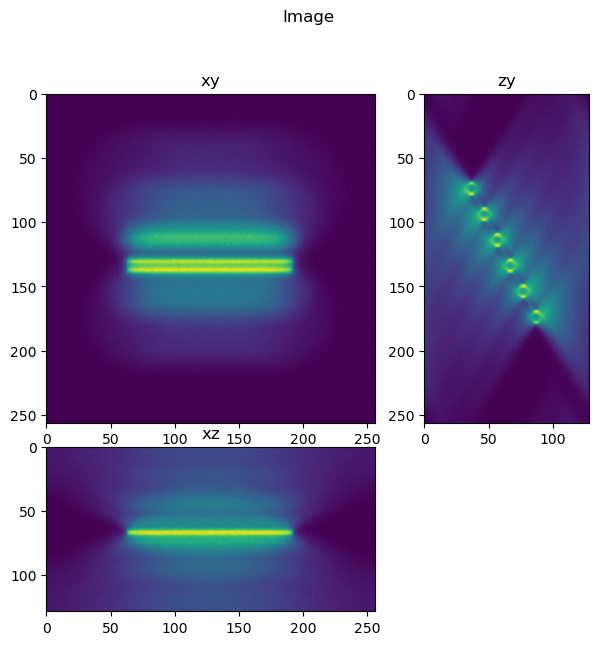

In [3]:
from tnia.plotting.projections import show_xyz_slice_center 

fig = show_xyz_slice_center(im, figsize=(7,7))
fig.suptitle('Image')

## Use stackview to explore data

Alternatively we can use the [stackview](https://github.com/haesleinhuepf/stackview) library to explore the data. 

In [4]:
import stackview
stackview.orthogonal(psf, continuous_update=True)
stackview.orthogonal(truth, continuous_update=True)
stackview.orthogonal(im, continuous_update=True)


## Import deconvolution libraries

Try importing the clij2 and redlionfish implementations of Richardson Lucy.  If they are found perform a deconvolution with each library

In [5]:
try:
    from clij2fft.richardson_lucy import richardson_lucy_nc
    clij2_rl_found=True
    
except ImportError:
    clij2_rl_found=False
try:
    import RedLionfishDeconv as rl
    redlionfish_rl_found=True
except ImportError:
    redlionfish_rl_found=False
    
print('clij2 rl found',clij2_rl_found)
print('redlionfish rl found',redlionfish_rl_found)    

clij2 rl found True
redlionfish rl found True


## Deconvolve with clij2

get lib

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 
Richardson Lucy Finished

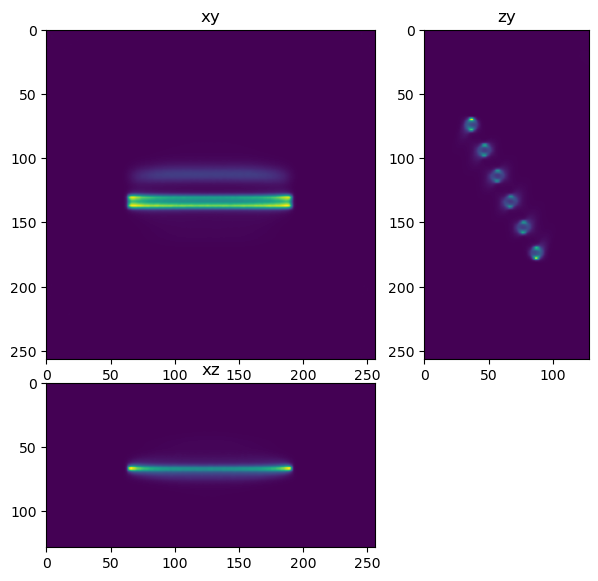

In [6]:
if clij2_rl_found==True:
    decon_clij2=richardson_lucy_nc(im,psf,100,0)
    show_xyz_slice_center(decon_clij2,figsize=(7,7))
else:
    print('clij2 not found')
    decon_clij2=np.zeros_like(im)

## Look at the deconvolution result with stackview

In [7]:
stackview.orthogonal(decon_clij2, continuous_update=True)

## Deconvolve with redlionfish

In [8]:
if redlionfish_rl_found==True:
    decon_rlf=rl.doRLDeconvolutionFromNpArrays(im, psf, niter=100, method='gpu', resAsUint8=False )
else:
    print('redlionfish not found')
    decon_rlf=np.zeros_like(im)

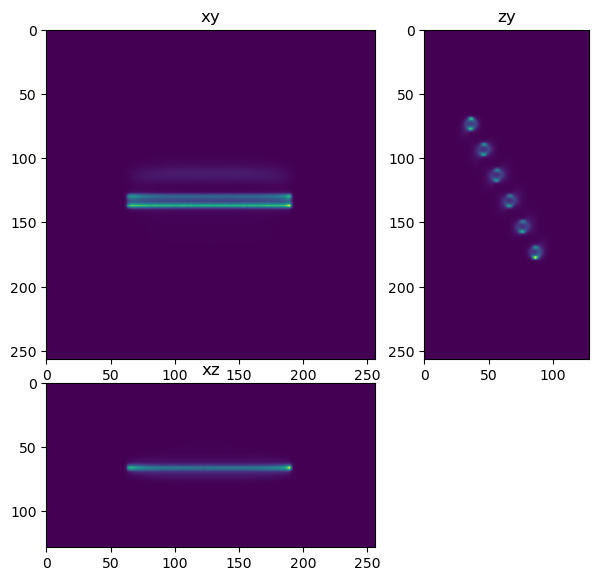

In [9]:
fig=show_xyz_slice_center(decon_rlf, figsize=(7,7))

## View data in Napari and ask questions

View the data in Napari, switch to a 3D view and rotate and explore the dataset?  How good is the reconstruction?  Is it a truer representation of the data as compared to the image?  

Excercise: Deconvolve the data for 1000 iterations, or 10,000 if you have a fast GPU (or even 100,000 if you have a fast GPU and a bit of time).  Does the reconstruction continue to improve with more iterations?

In [10]:
import napari
viewer=napari.Viewer()
viewer.add_image(im)
viewer.add_image(decon_clij2)
viewer.add_image(decon_rlf)
viewer.add_image(truth)

<Image layer 'truth' at 0x7f6e400cf7f0>